##MODEL SETUP: In this phase we will set up the requirments for this program


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#PERCEPTRON API

In [20]:
#Define Perceptron class
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [21]:
#ADALINE API -Gradient Descent

In [22]:
# Define AdalineGD class (Gradient Descent)
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [23]:
#ADALINE API -Stchastic 

In [24]:

# Define AdalineSGD class (Stochastic Gradient Descent)
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Function to run and visualize models with 2-15 iterations
def run_perceptron_model(X, y, n_iter_list):
    for n_iter in n_iter_list:
        ppn = Perceptron(eta=0.1, n_iter=n_iter)
        ppn.fit(X, y)
        plt.figure()
        plot_decision_regions(X, y, classifier=ppn)
        plt.title(f'Perceptron Model with {n_iter} iterations')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend(loc='upper left')
        plt.show()

def run_adaline_model(X, y, n_iter_list, model_type="GD"):
    for n_iter in n_iter_list:
        if model_type == "GD":
            model = AdalineGD(n_iter=n_iter, eta=0.01)
        else:
            model = AdalineSGD(n_iter=n_iter, eta=0.01, random_state=1)

        model.fit(X, y)
        plt.figure()
        plot_decision_regions(X, y, classifier=model)
        plt.title(f'Adaline {model_type} with {n_iter} iterations')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend(loc='upper left')
        plt.show()


## Loaded Data
The assignment asks us to load the iris data set for analysis. 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the dataset (ensure you adjust the path or file name as needed)
df = pd.read_csv(r"C:\Users\17063\Downloads\Iris.csv")
print(df.head())

print(df.tail())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width           Class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


# Prelimanary Data Analysis The assignment requires us to identify two class and to find feature sets in groups of 2,3, and 4 which are linearly and non-linearly seperated. To perofrm this task i compared all 3 classes, aginst their features using a scatter plot. We can see from the scatter plots that Iris-setosa is linearly seperated from verisocolor and virginica. However versicolor and virginica in not linearly seperate, as it show severl instances of overlap

In [41]:
df['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

# Plot Data Across 2 Class, and 4 Features

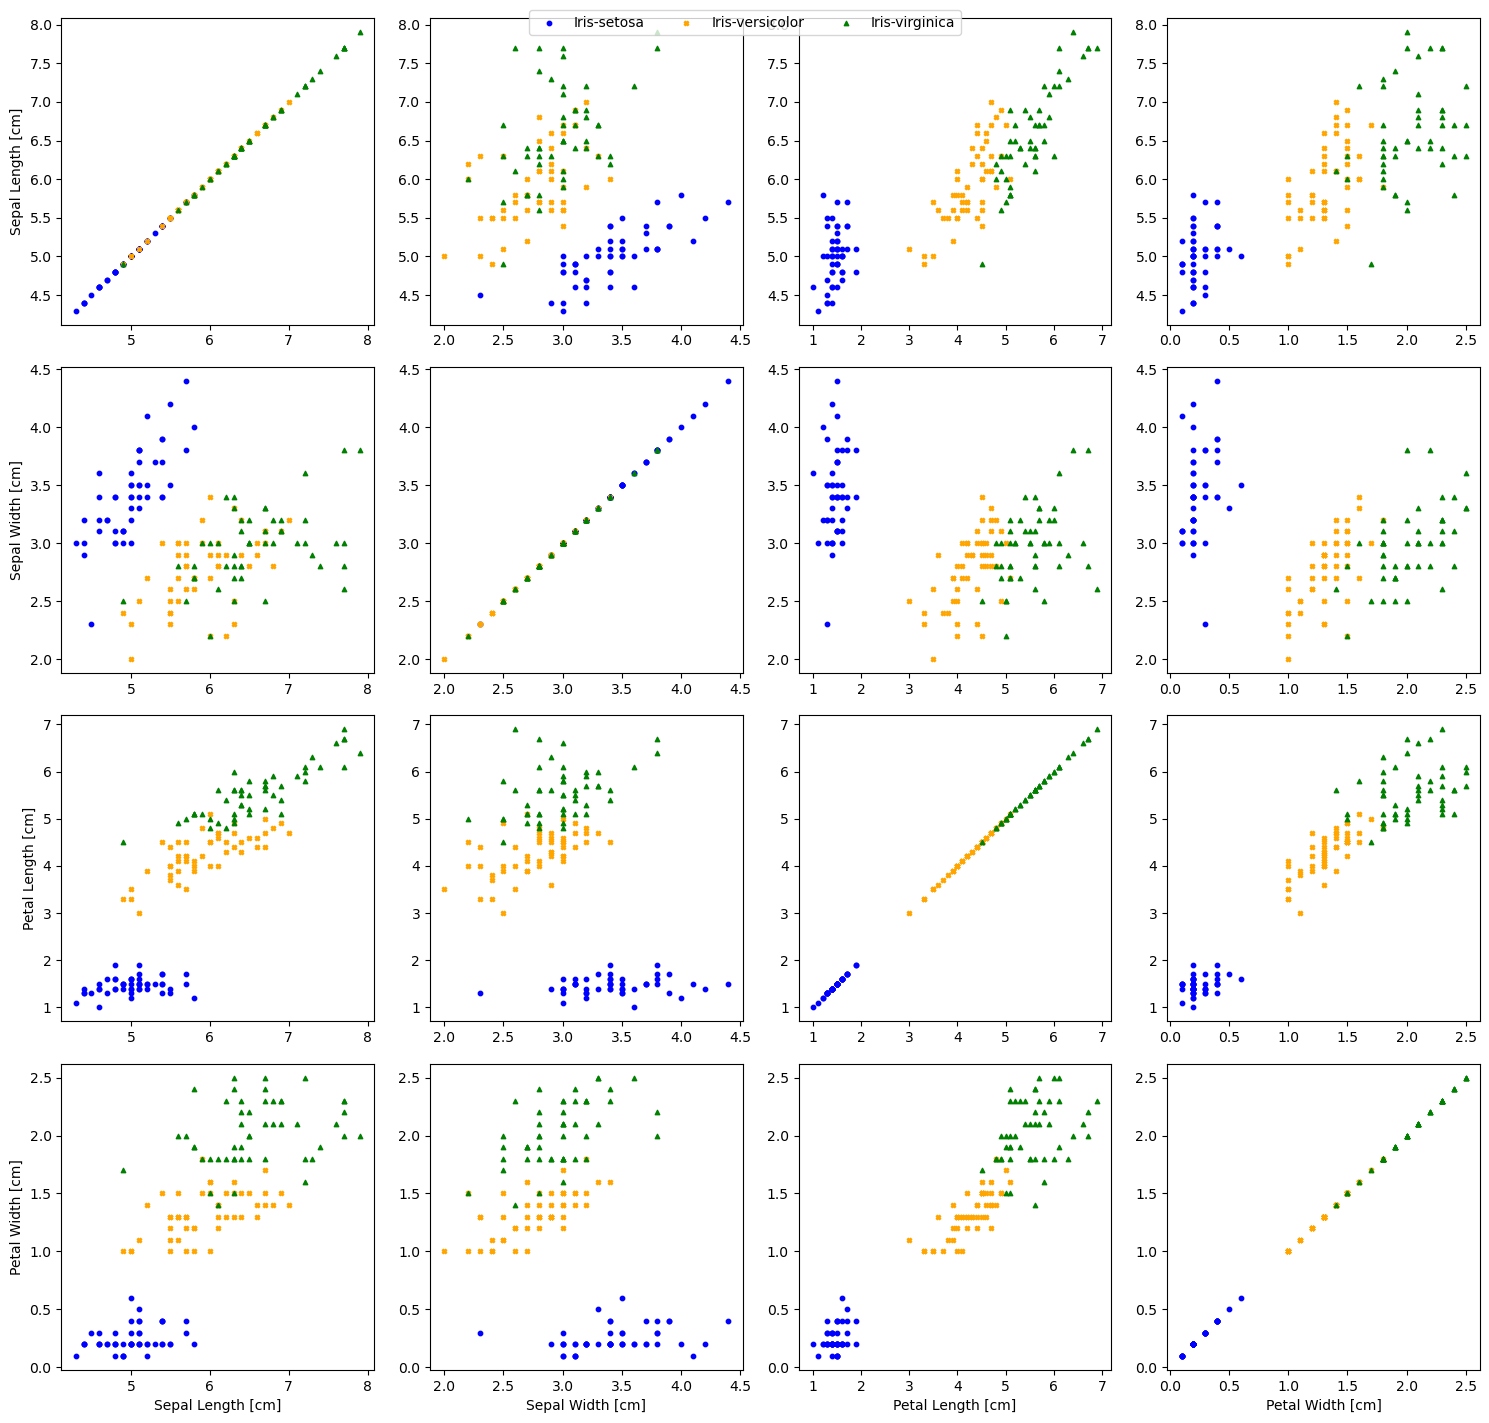

In [43]:
import matplotlib.pyplot as plt

# Plot Data Across 2 Classes and 4 Features
DA_Fig, DA_Axs = plt.subplots(4, 4, figsize=(15, 15))

# Define labels for each axis
y_labels = ['Sepal Length [cm]', 'Sepal Width [cm]', 'Petal Length [cm]', 'Petal Width [cm]']
x_labels = ['Sepal Length [cm]', 'Sepal Width [cm]', 'Petal Length [cm]', 'Petal Width [cm]']

# Set the labels for y-axis
for i in range(4):
    DA_Axs[i, 0].set_ylabel(y_labels[i])

# Set the labels for x-axis
for i in range(4):
    DA_Axs[3, i].set_xlabel(x_labels[i])

# Define species and colors
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['blue', 'orange', 'green']
markers = ['o', 'X', '^']
ms = 10

# Define feature pairs for scatter plots
features = [
    ("Sepal_Length", "Sepal_Length"), ("Sepal_Width", "Sepal_Length"), ("Petal_Length", "Sepal_Length"), ("Petal_Width", "Sepal_Length"),
    ("Sepal_Length", "Sepal_Width"), ("Sepal_Width", "Sepal_Width"), ("Petal_Length", "Sepal_Width"), ("Petal_Width", "Sepal_Width"),
    ("Sepal_Length", "Petal_Length"), ("Sepal_Width", "Petal_Length"), ("Petal_Length", "Petal_Length"), ("Petal_Width", "Petal_Length"),
    ("Sepal_Length", "Petal_Width"), ("Sepal_Width", "Petal_Width"), ("Petal_Length", "Petal_Width"), ("Petal_Width", "Petal_Width")
]

# Iterate over each subplot and plot data for each class
for i, (x_feature, y_feature) in enumerate(features):
    row, col = divmod(i, 4)
    for cls, color, marker in zip(species, colors, markers):
        DA_Axs[row, col].scatter(df.loc[df['Class'] == cls, x_feature], 
                                df.loc[df['Class'] == cls, y_feature], 
                                ms,
                                color=color, 
                                marker=marker, 
                                label=cls if i == 0 else "")

# Add a legend to the plot
handles, labels = DA_Axs[0, 0].get_legend_handles_labels()
DA_Fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.95))

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the legend
plt.show()

##Plotting Perceptron and Adeline Model

C:\Users\17063\AppData\Local\Temp\ipykernel_38876\1662780288.py:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


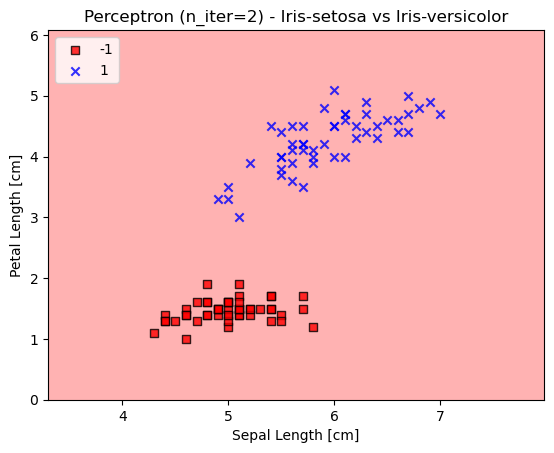

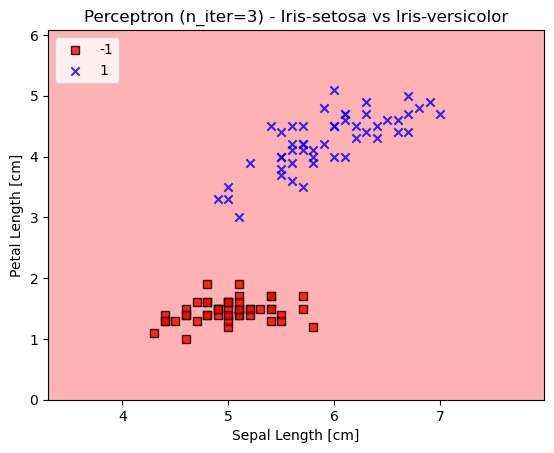

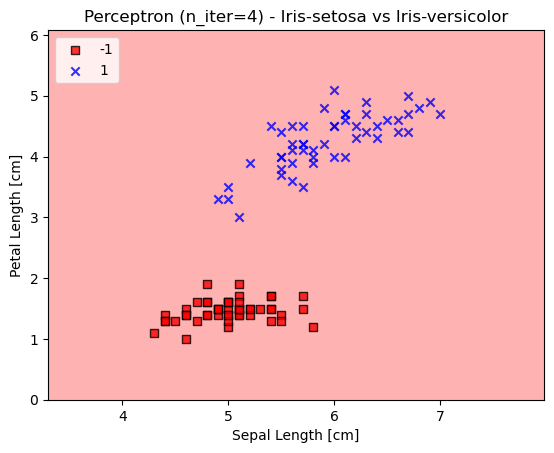

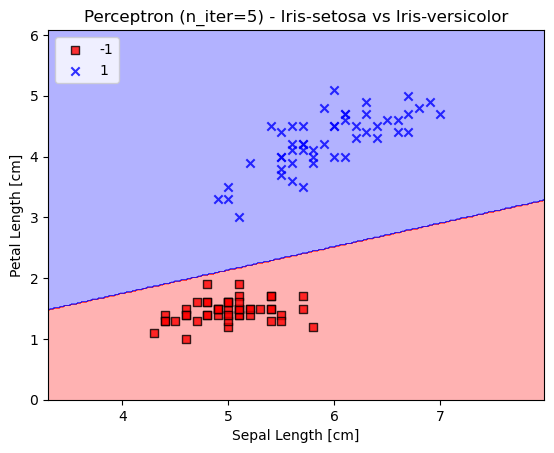

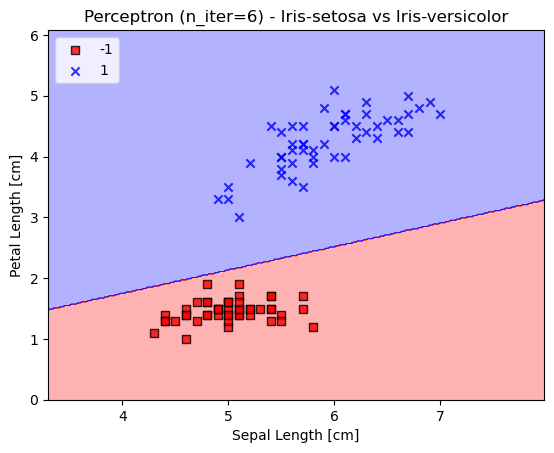

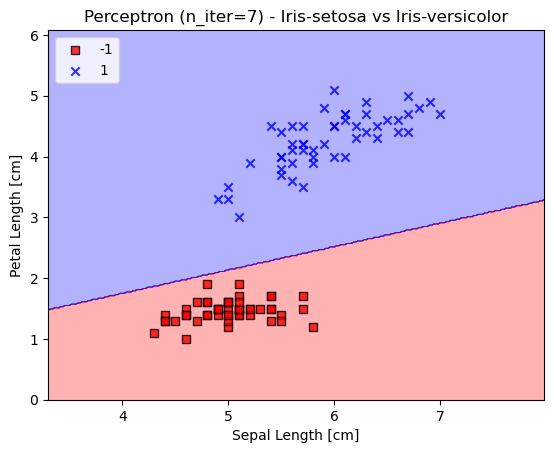

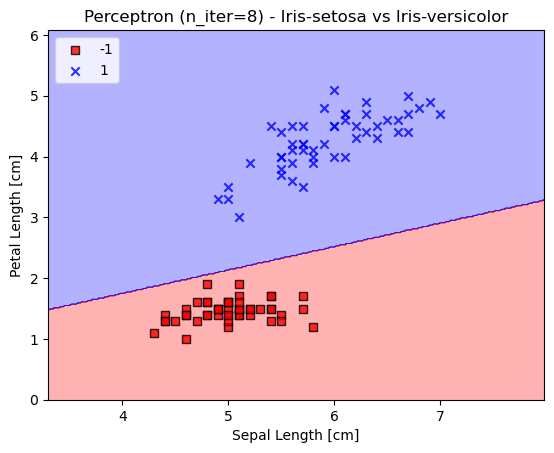

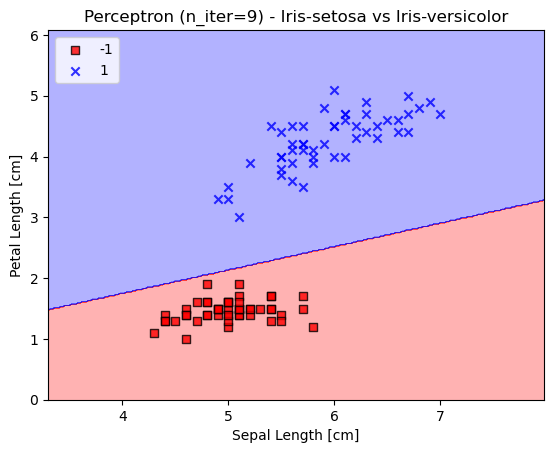

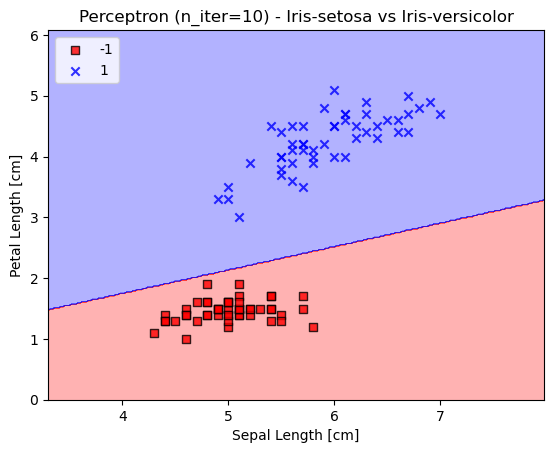

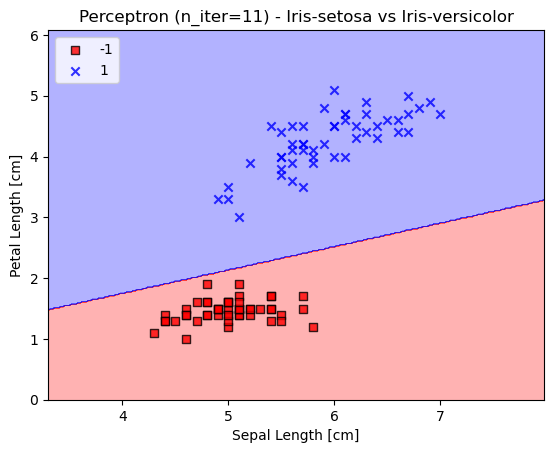

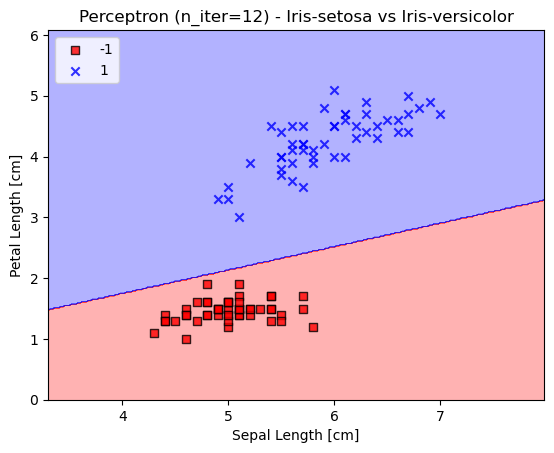

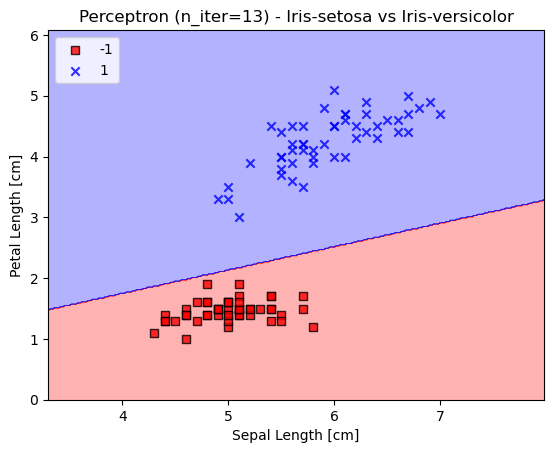

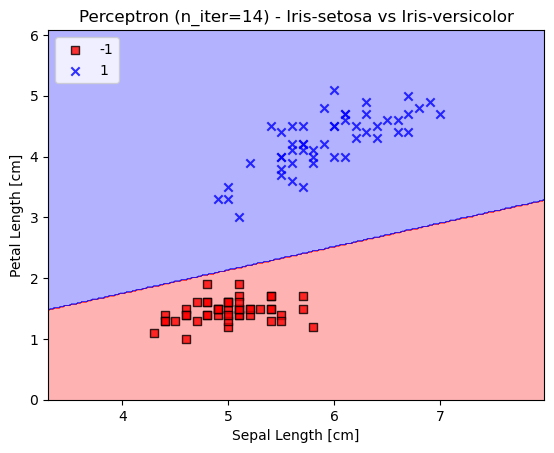

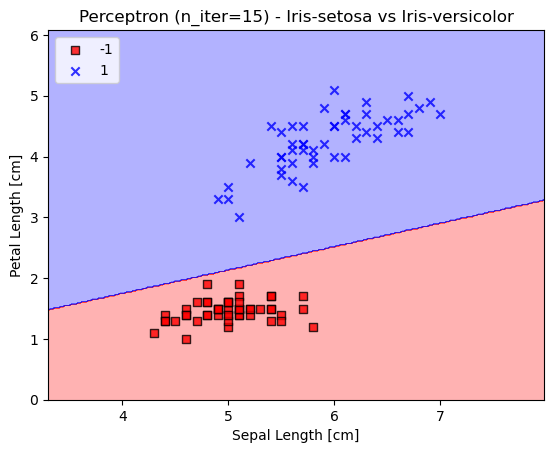

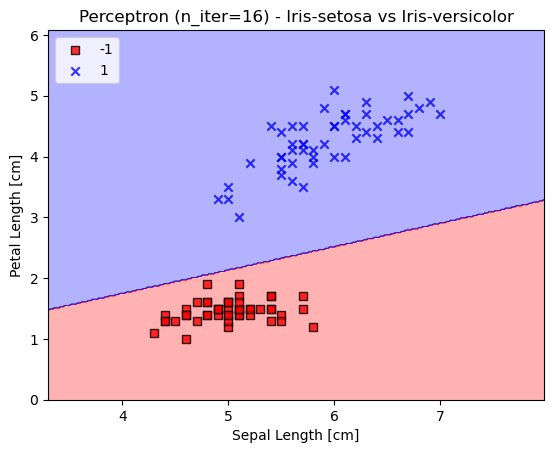

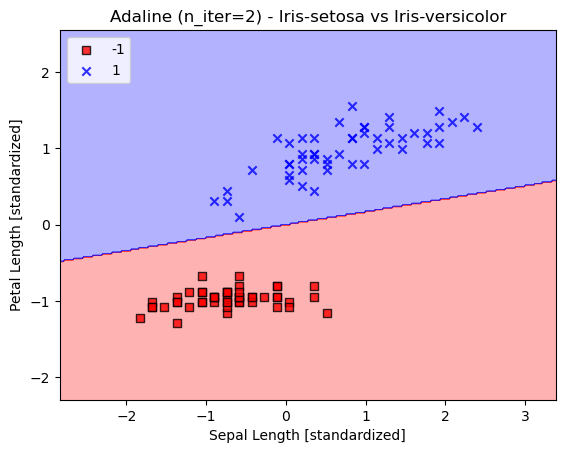

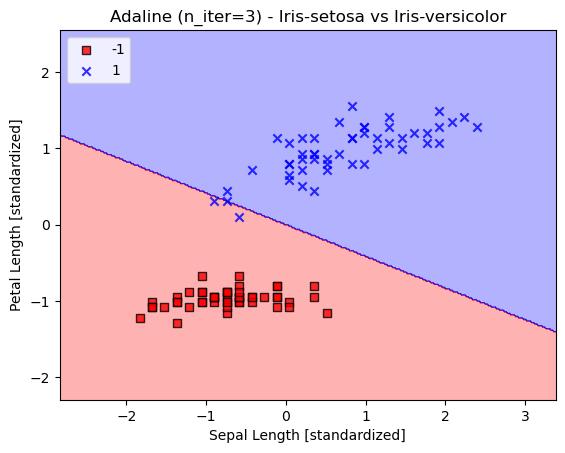

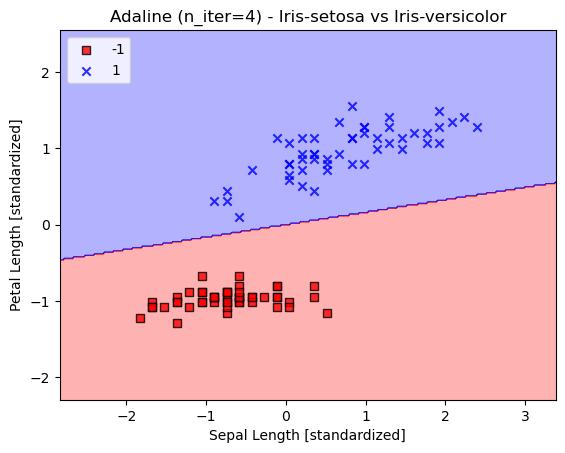

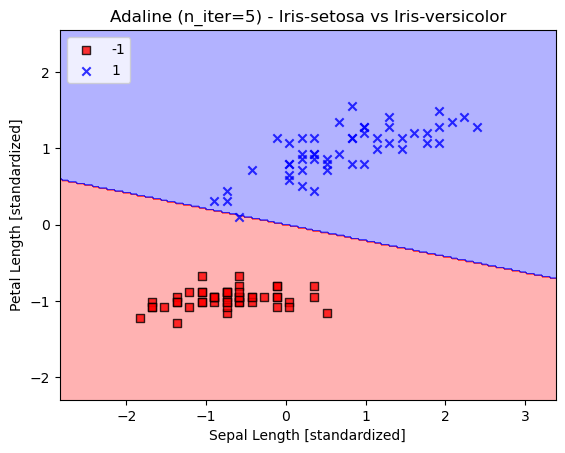

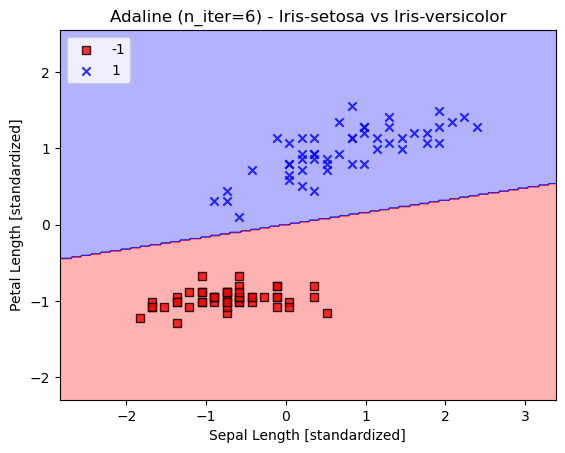

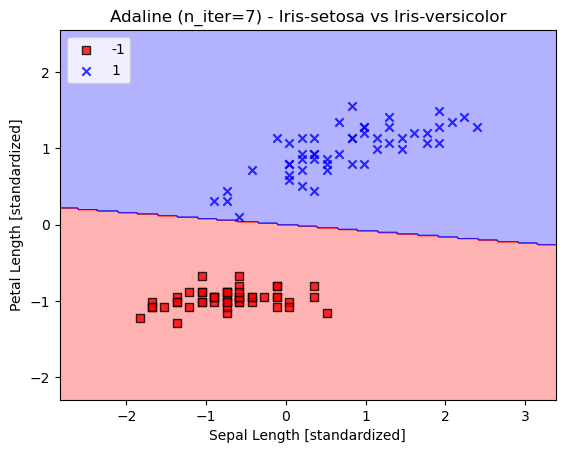

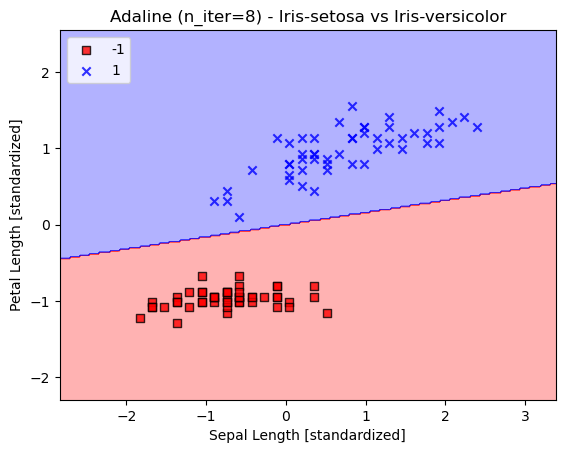

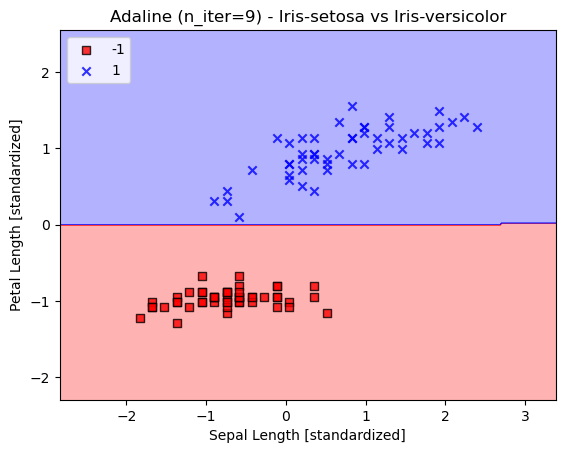

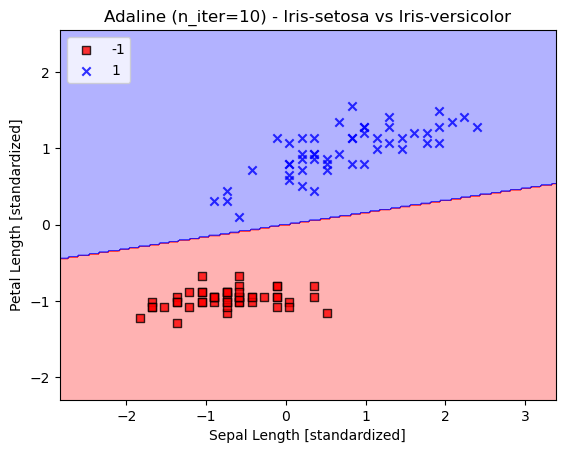

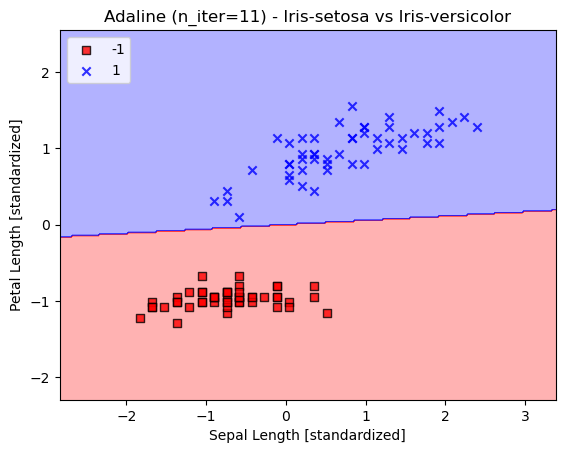

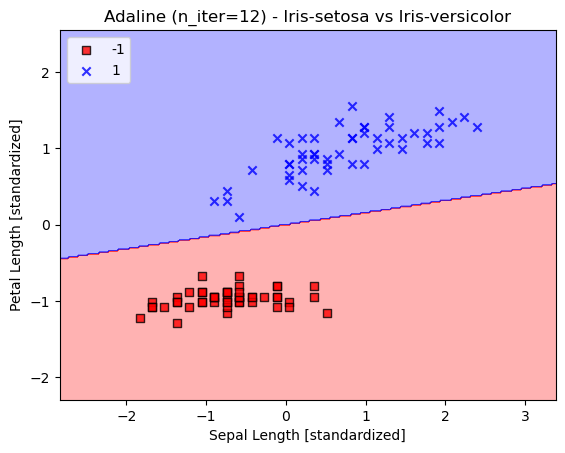

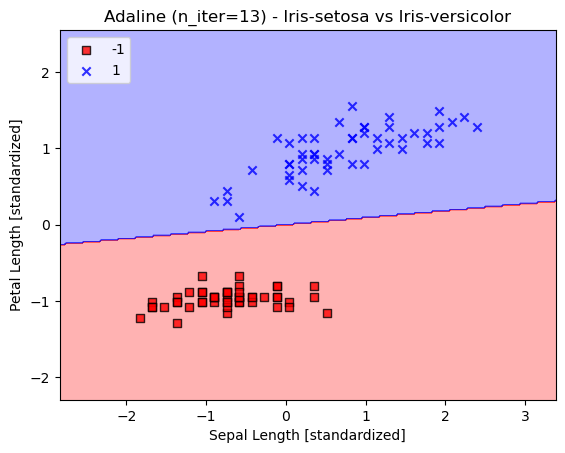

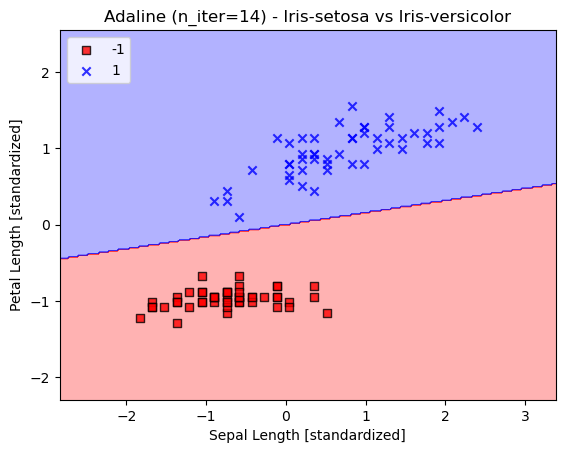

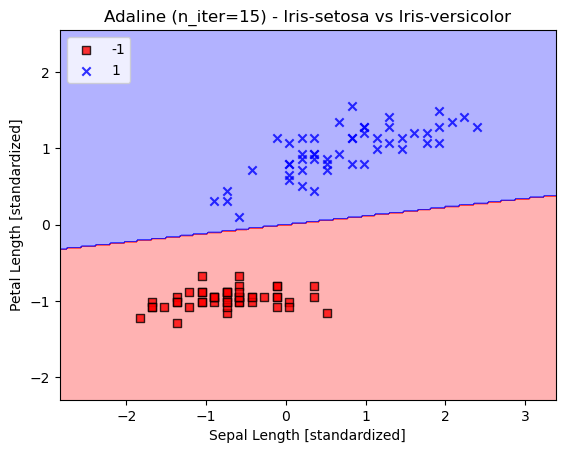

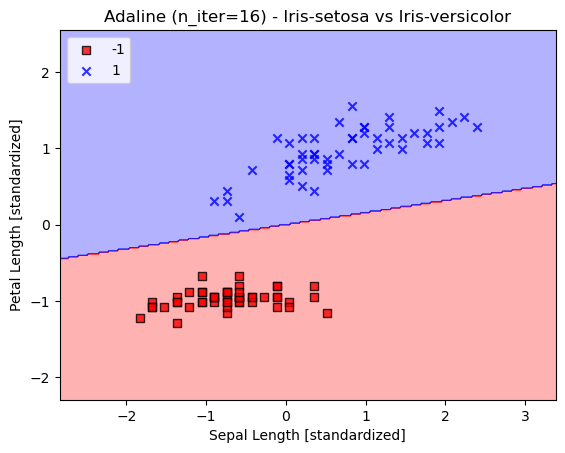

C:\Users\17063\AppData\Local\Temp\ipykernel_38876\1662780288.py:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


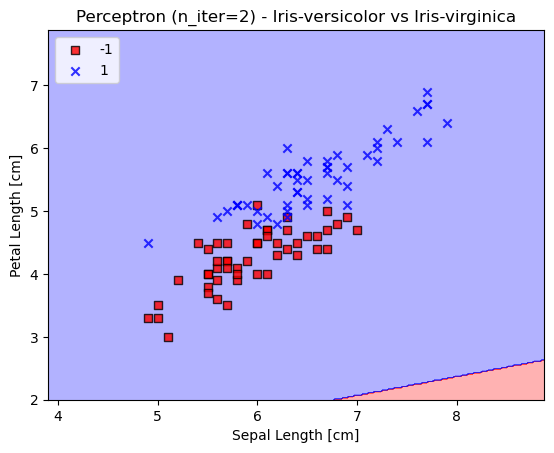

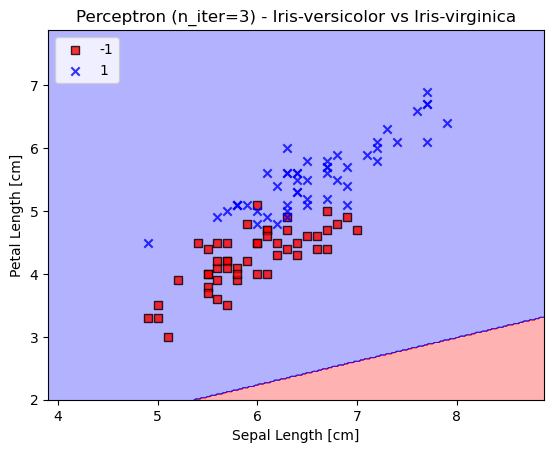

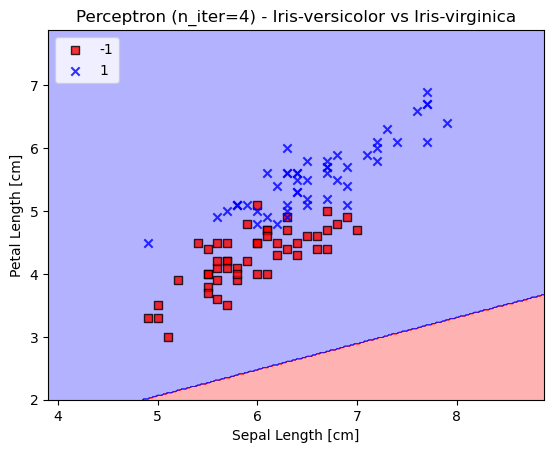

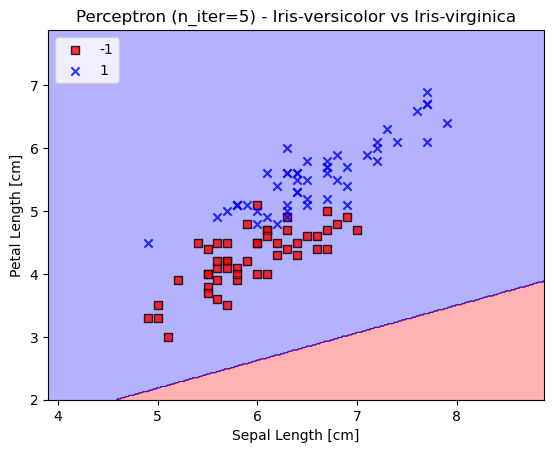

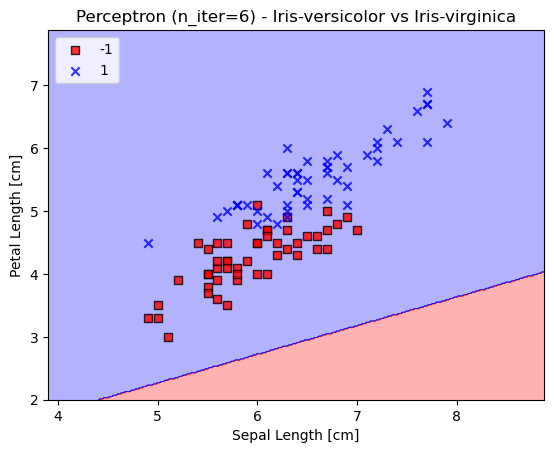

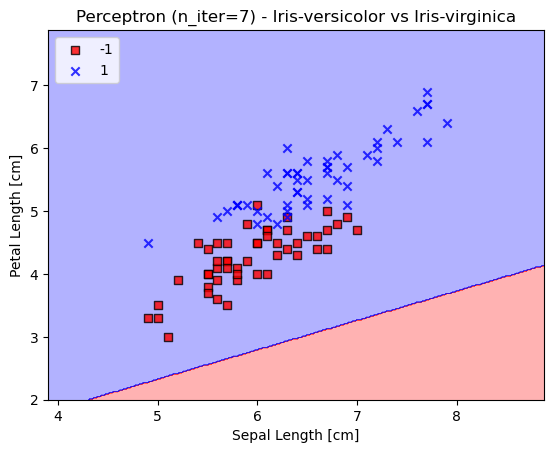

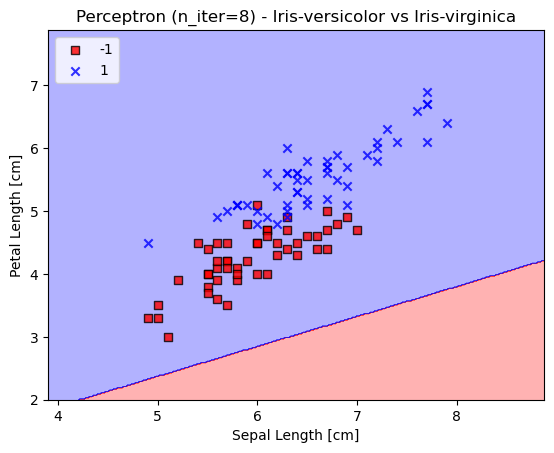

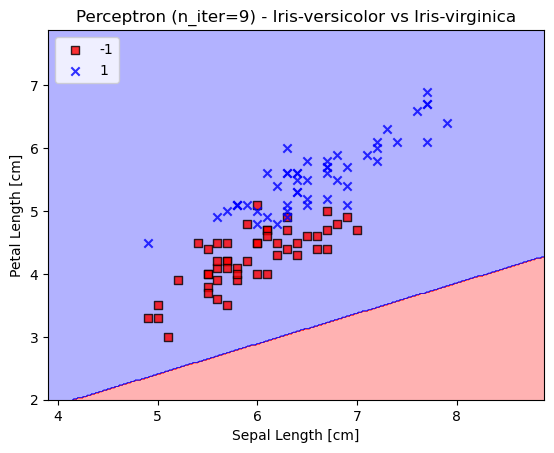

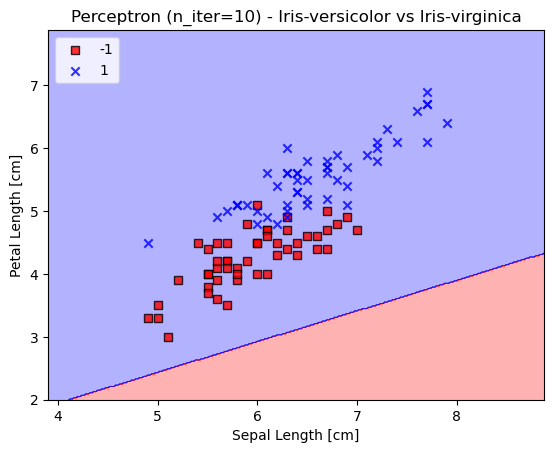

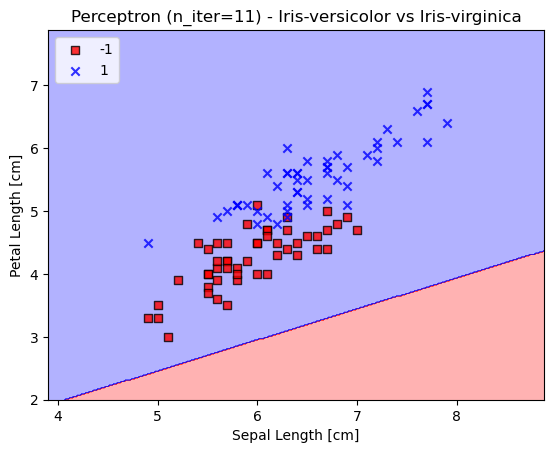

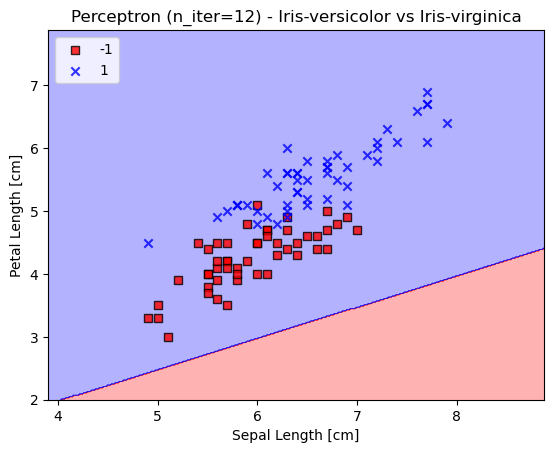

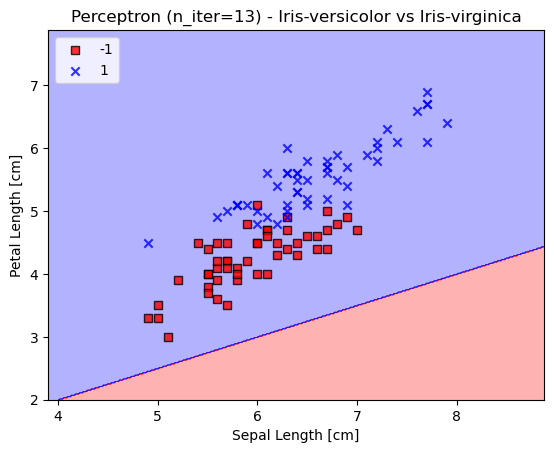

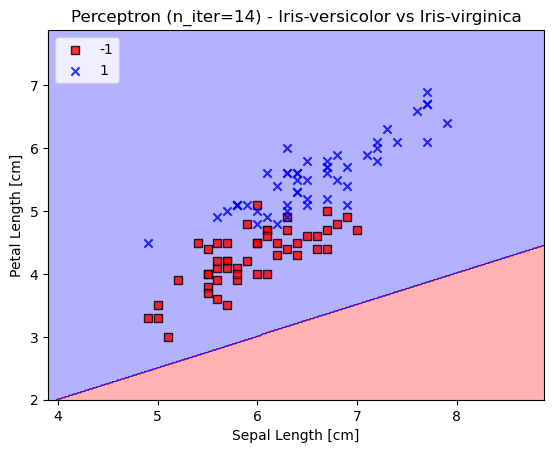

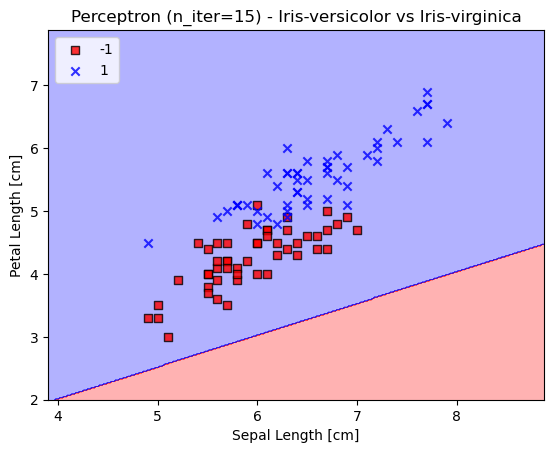

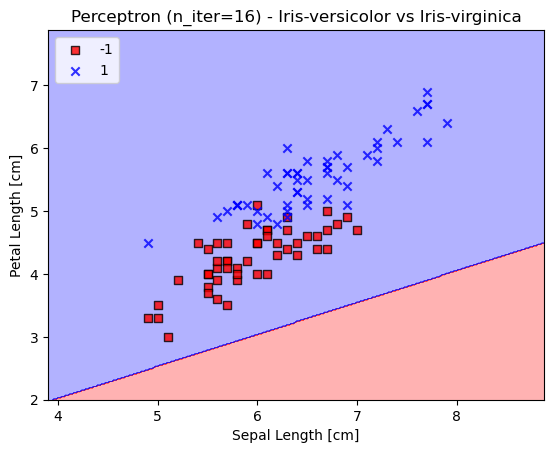

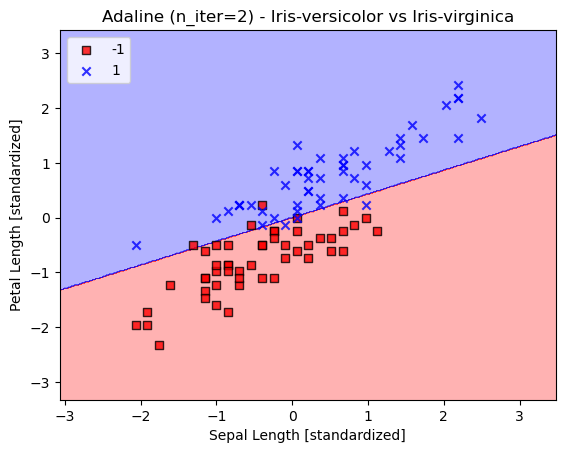

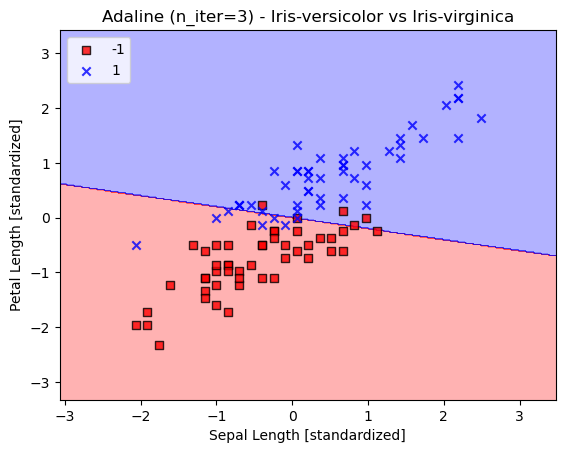

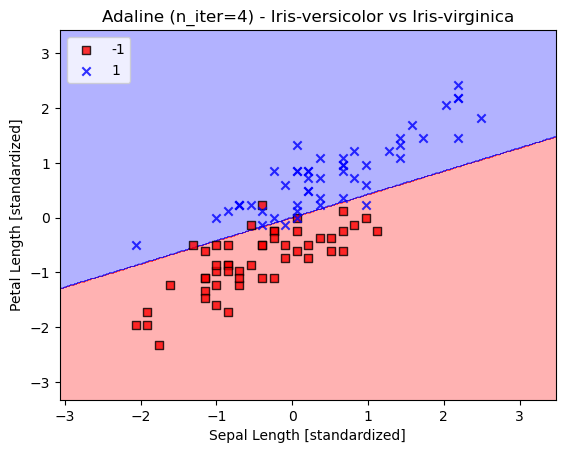

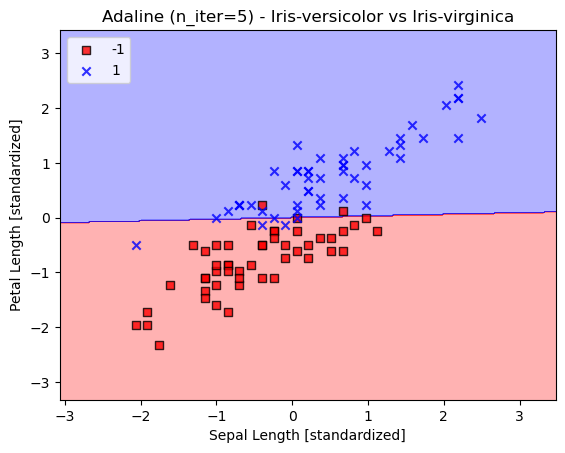

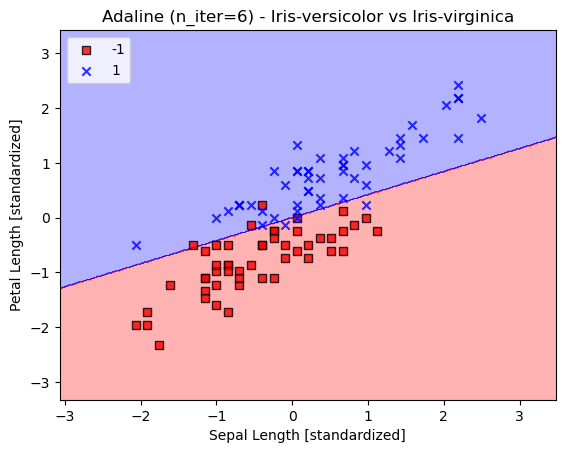

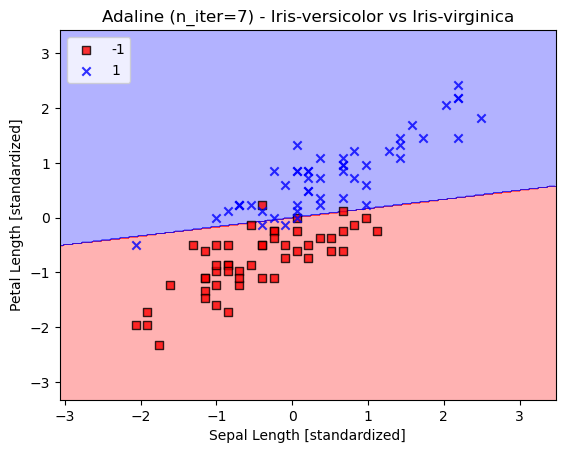

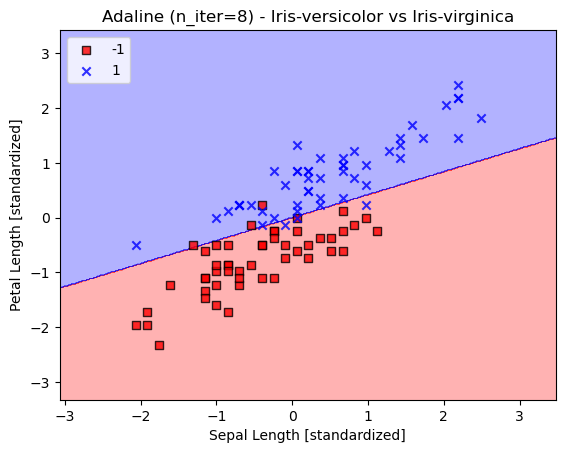

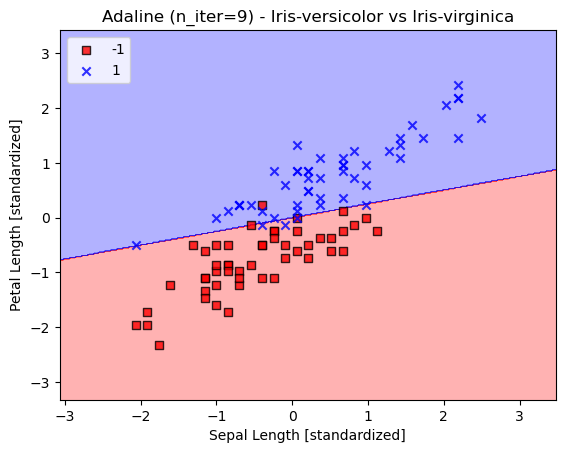

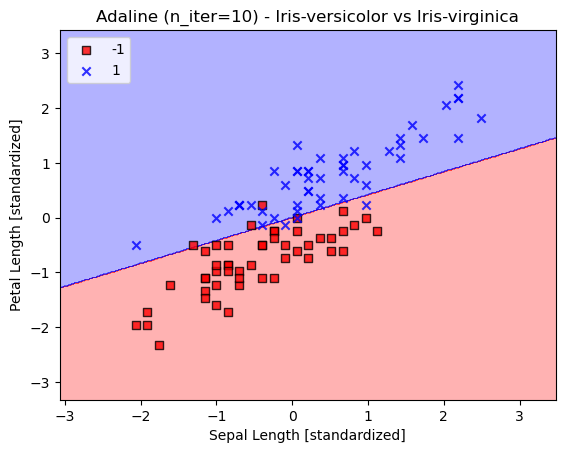

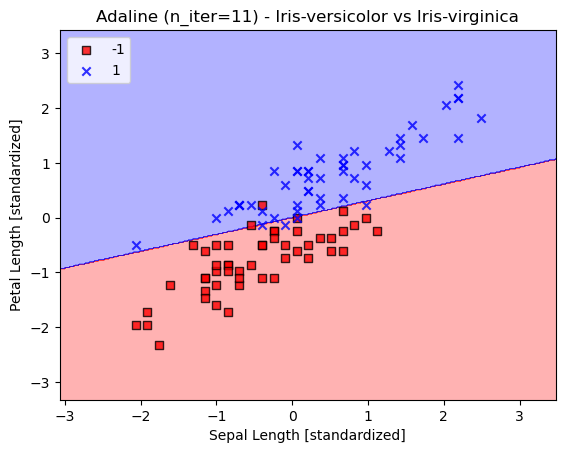

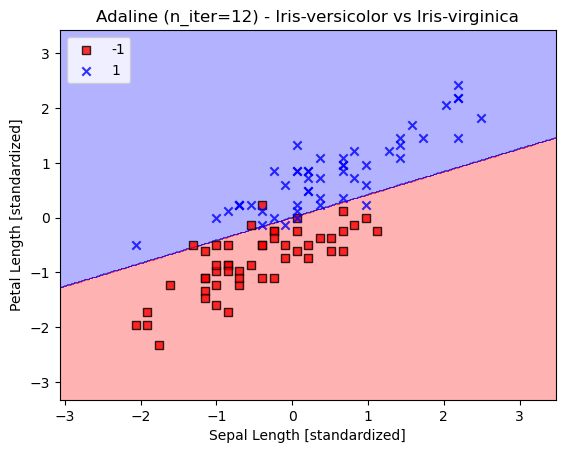

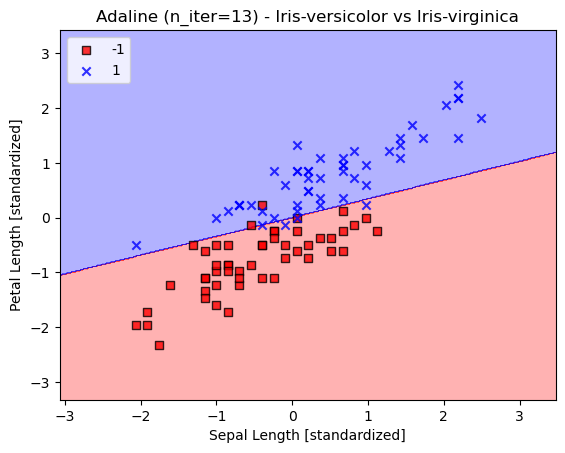

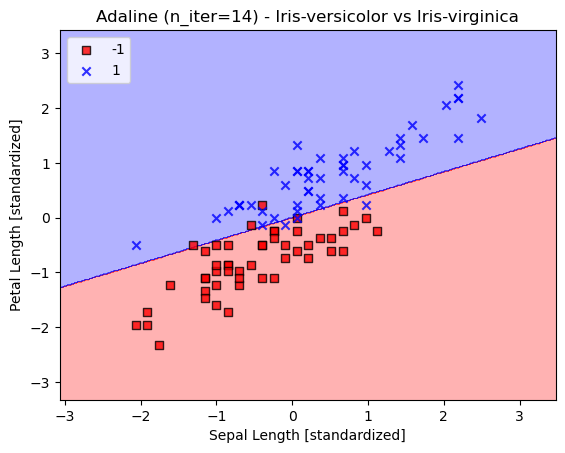

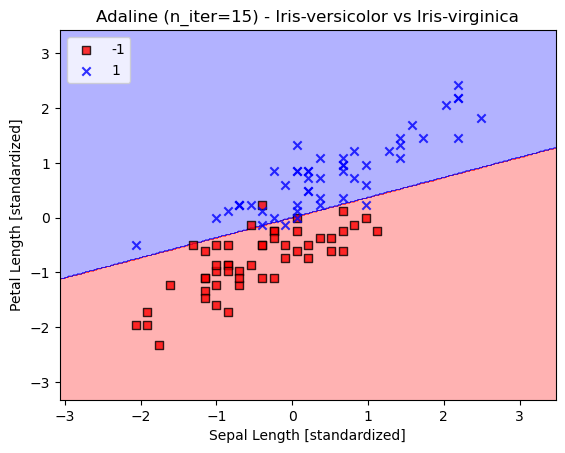

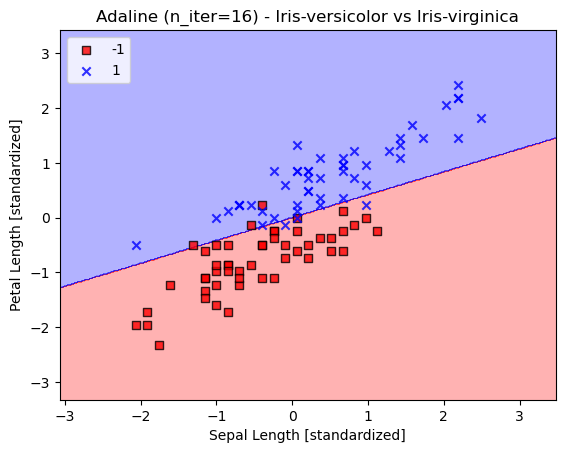

C:\Users\17063\AppData\Local\Temp\ipykernel_38876\1662780288.py:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


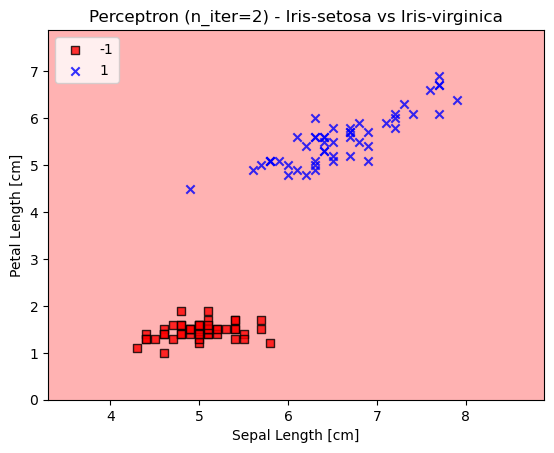

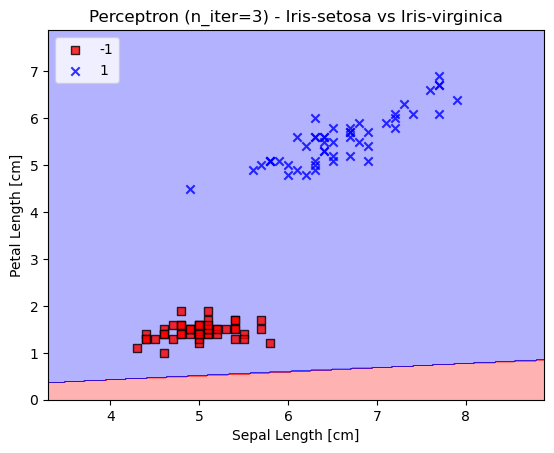

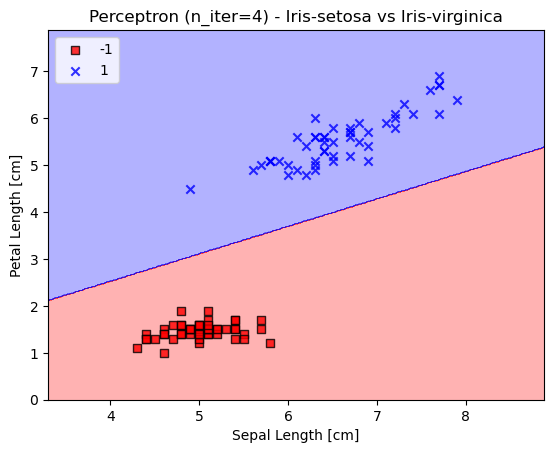

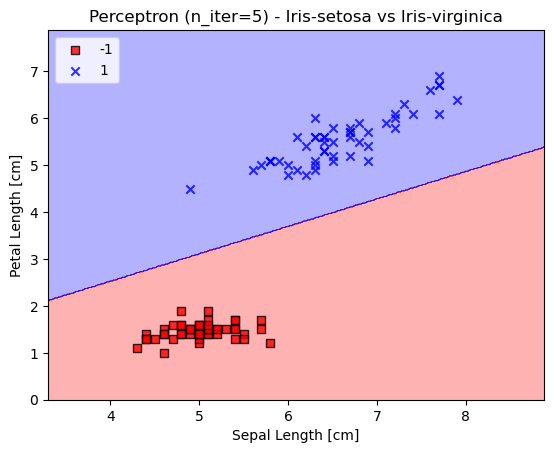

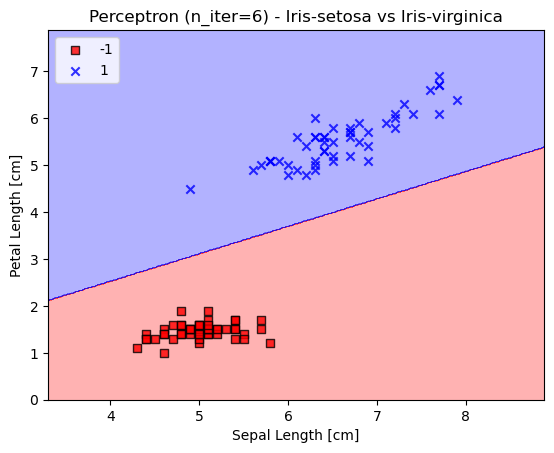

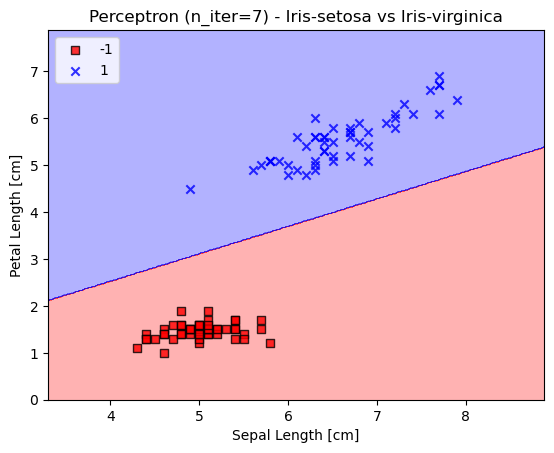

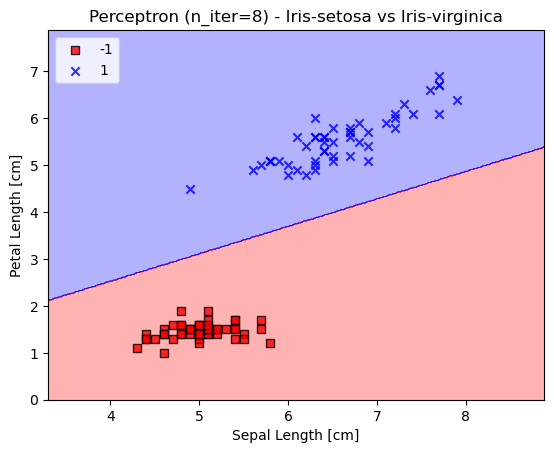

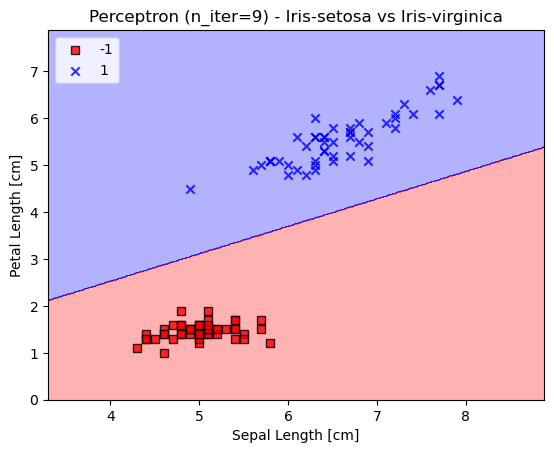

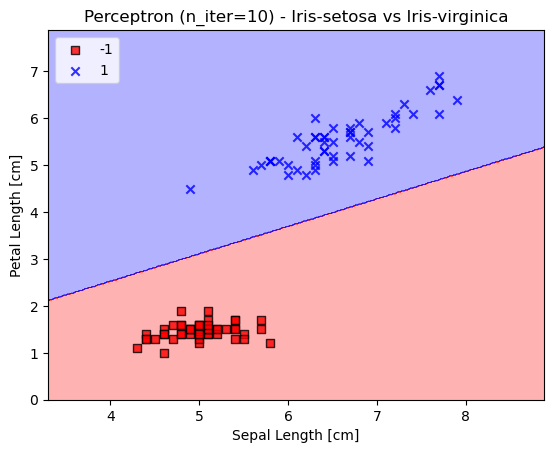

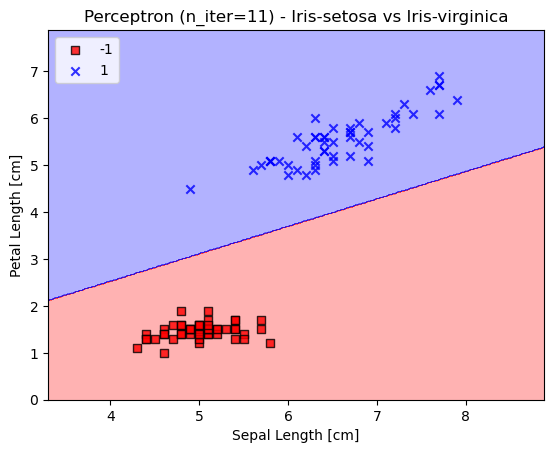

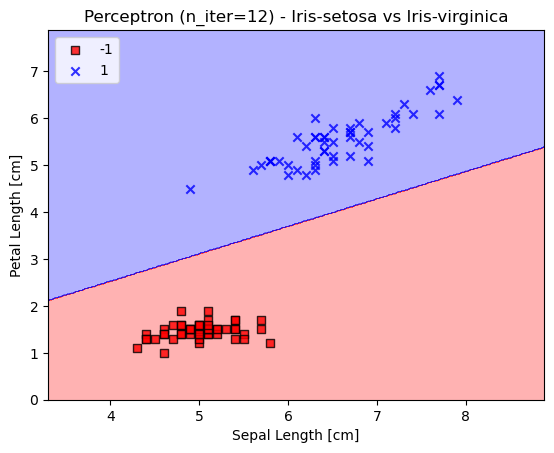

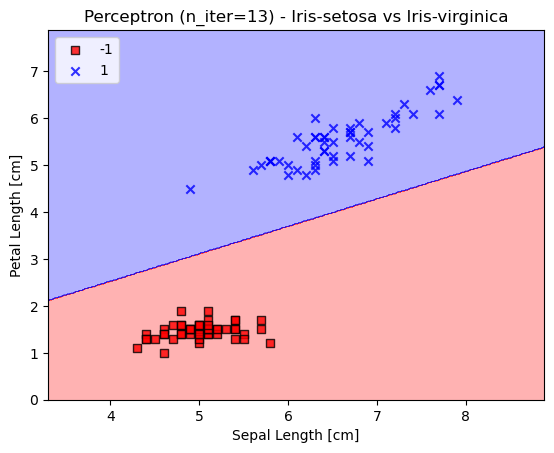

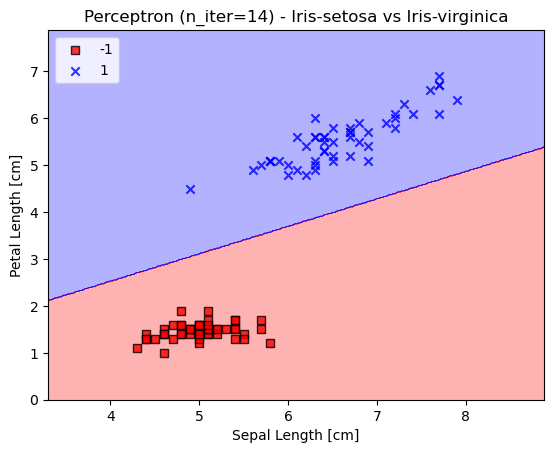

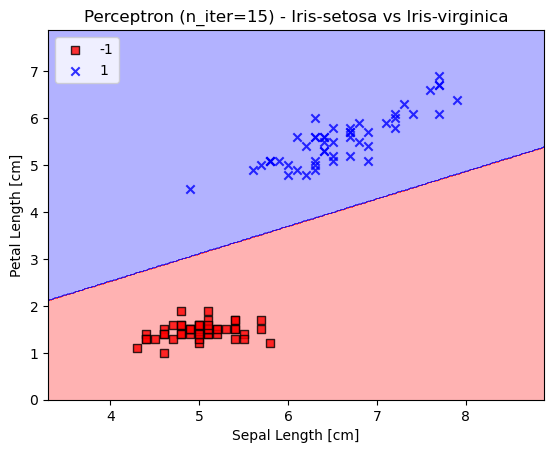

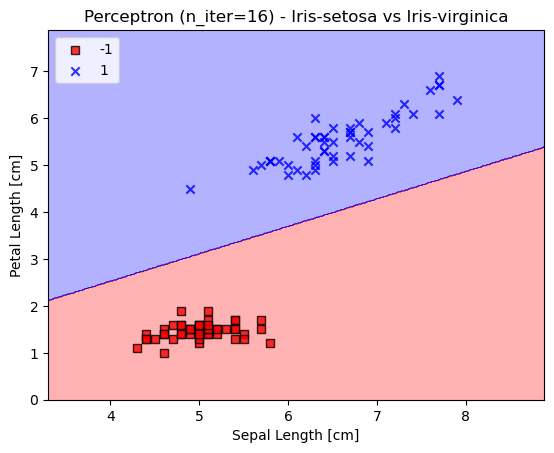

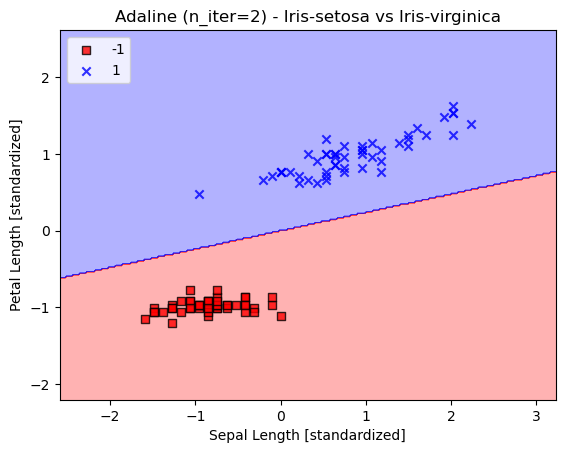

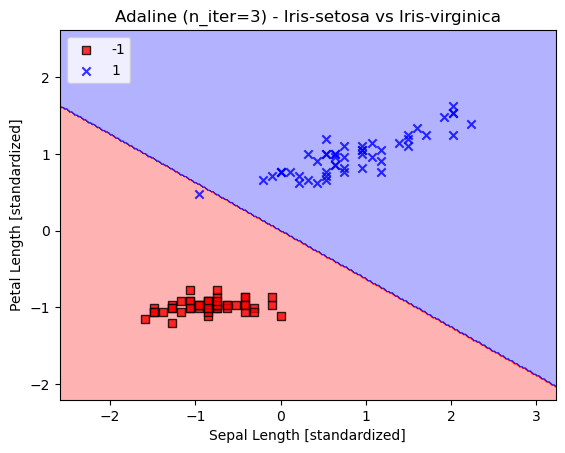

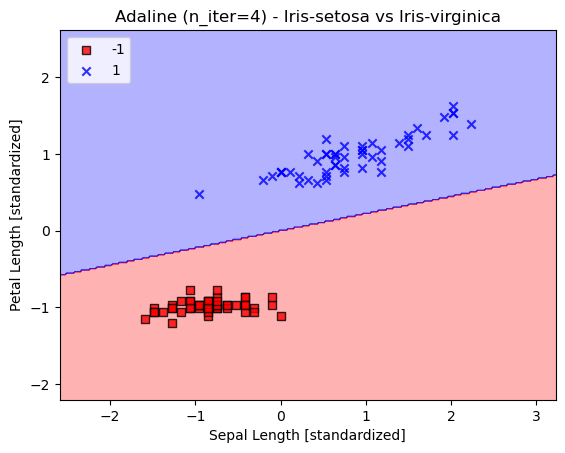

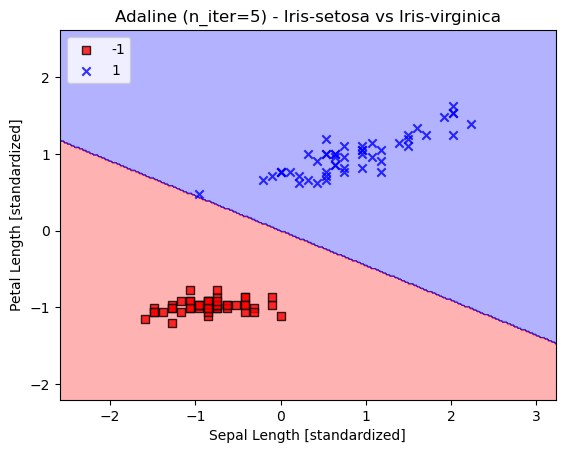

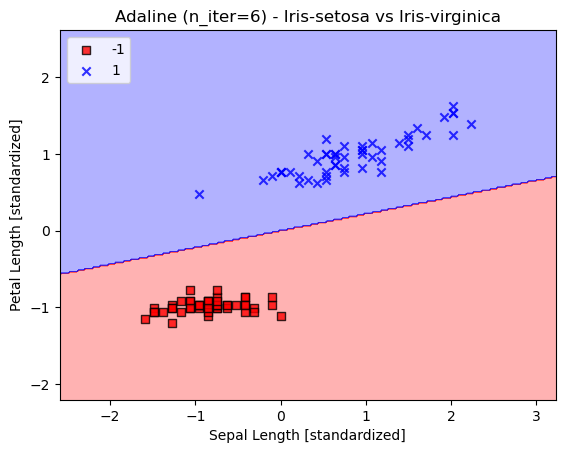

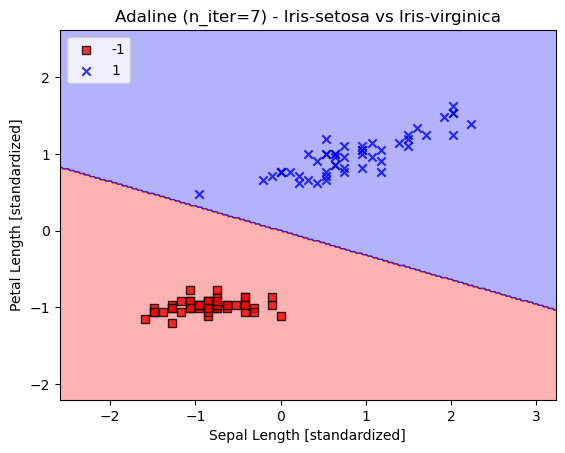

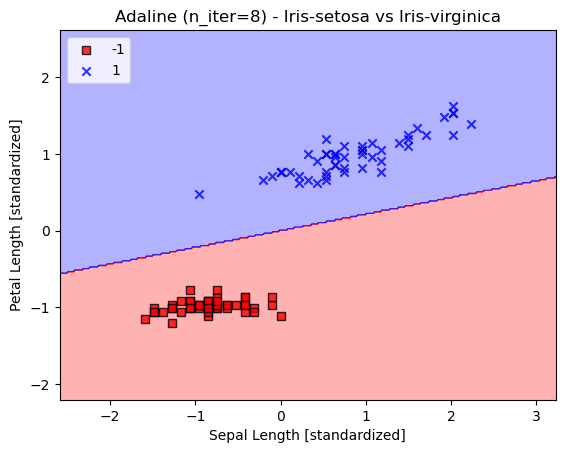

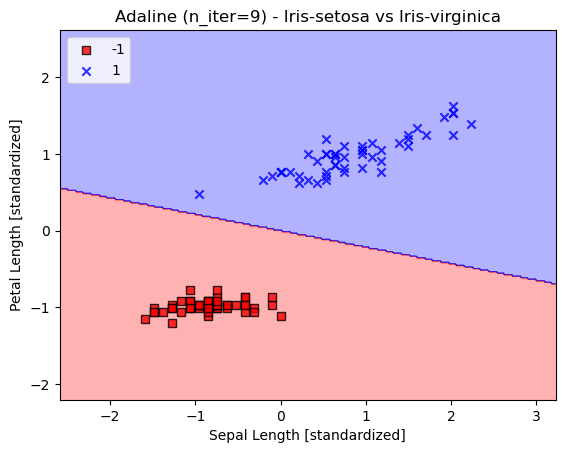

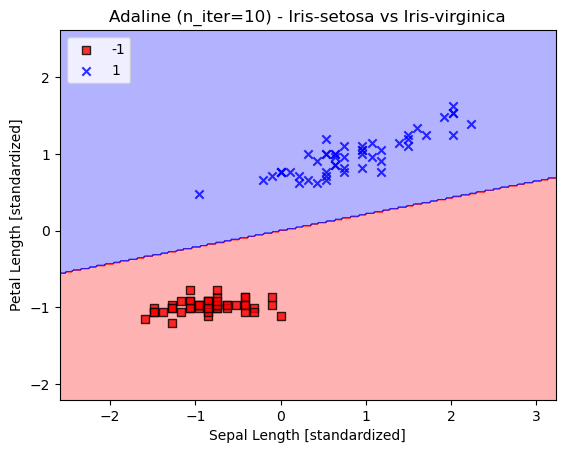

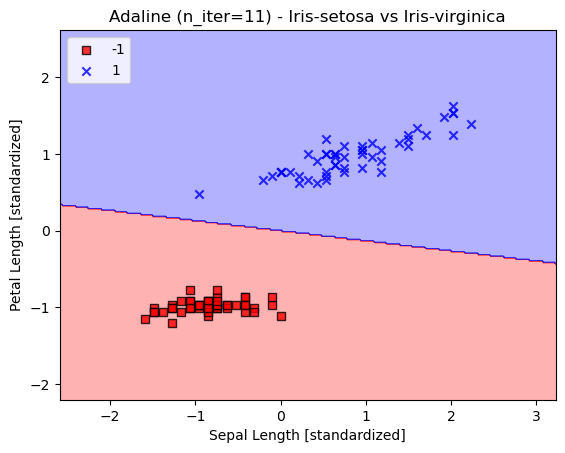

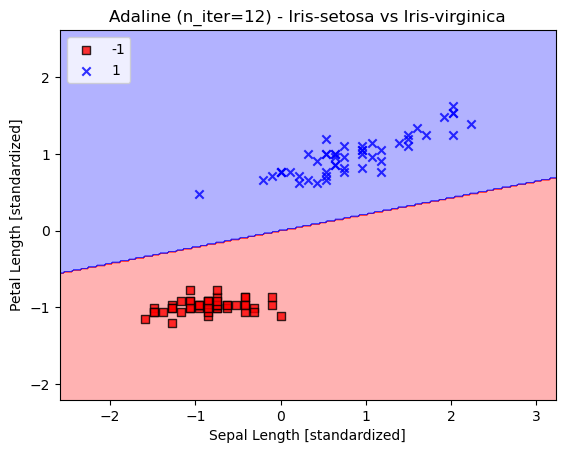

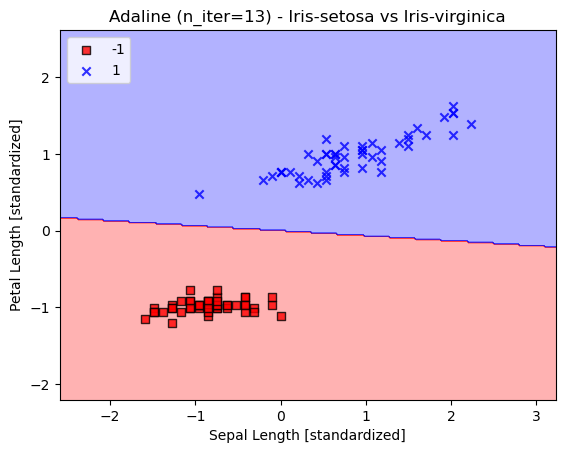

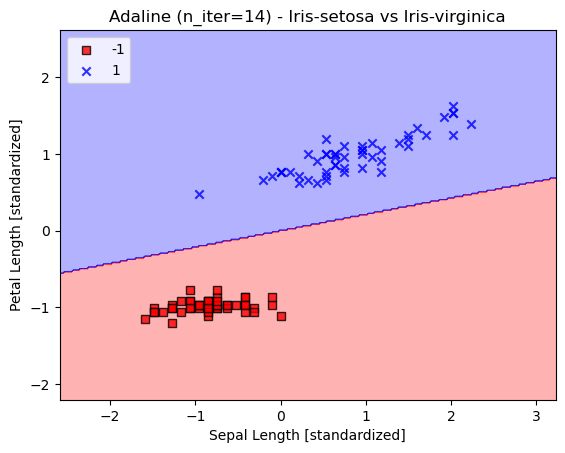

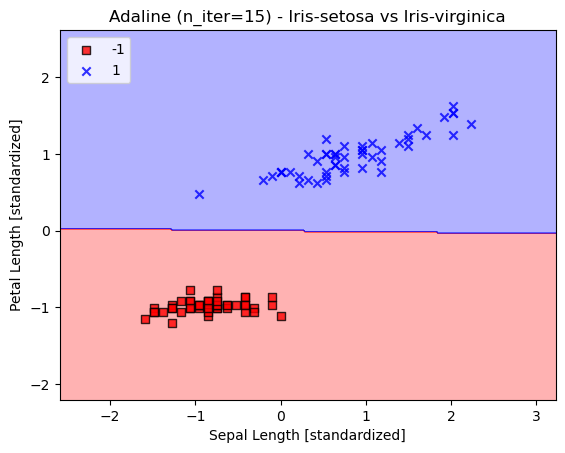

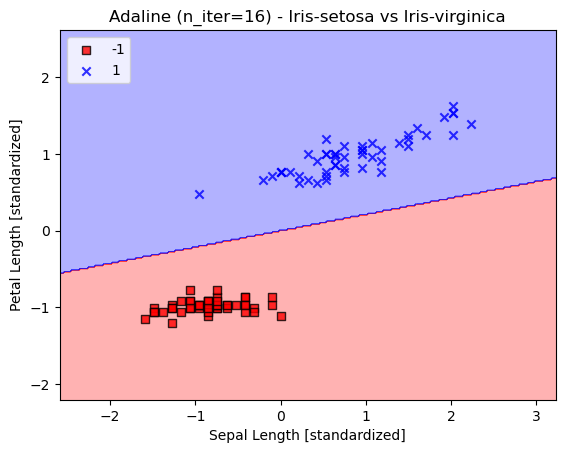

In [27]:

# Function to prepare data for different species combinations
def prepare_binary_classification_data_species(df, class1, class2, feature1='Sepal_Length', feature2='Petal_Length'):
    df_binary = df[df['Class'].isin([class1, class2])]
    X = df_binary[[feature1, feature2]].values
    y = np.where(df_binary['Class'] == class1, -1, 1)
    return X, y

# Function to run Perceptron and Adaline models for given species
def run_models_species_combinations(df, class1, class2):
    X, y = prepare_binary_classification_data_species(df, class1, class2)

    # Perceptron model
    for n_iter in range(2, 17):
        ppn = Perceptron(eta=0.1, n_iter=n_iter)
        ppn.fit(X, y)
        plt.figure()
        plot_decision_regions(X, y, classifier=ppn)
        plt.title(f'Perceptron (n_iter={n_iter}) - {class1} vs {class2}')
        plt.xlabel('Sepal Length [cm]')
        plt.ylabel('Petal Length [cm]')
        plt.legend(loc='upper left')
        plt.show()

    # Standardizing the features for Adaline
    X_std = np.copy(X)
    X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

    # Adaline model
    for n_iter in range(2, 17):
        ada = AdalineGD(n_iter=n_iter, eta=0.01)
        ada.fit(X_std, y)
        plt.figure()
        plot_decision_regions(X_std, y, classifier=ada)
        plt.title(f'Adaline (n_iter={n_iter}) - {class1} vs {class2}')
        plt.xlabel('Sepal Length [standardized]')
        plt.ylabel('Petal Length [standardized]')
        plt.legend(loc='upper left')
        plt.show()

# Example runs for different species combinations
run_models_species_combinations(df, 'Iris-setosa', 'Iris-versicolor')
run_models_species_combinations(df, 'Iris-versicolor', 'Iris-virginica')
run_models_species_combinations(df, 'Iris-setosa', 'Iris-virginica')


Select two classes and two features 


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Class'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Rename columns to match your feature names
df = df.rename(columns={
    'petal length (cm)': 'Petal_Length',
    'petal width (cm)': 'Petal_Width'
})

def prepare_binary_classification(df, class1, class2, features):
    df_binary = df[df['Class'].isin([class1, class2])]
    X = df_binary[features].values
    y = np.where(df_binary['Class'] == class1, -1, 1)
    return X, y

features = ['Petal_Length', 'Petal_Width']
X, y = prepare_binary_classification(df, 'setosa', 'versicolor', features)

# Print shapes to verify
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100, 2)
y shape: (100,)


In [4]:
## Use three features features = ['Petal_Length', 'Petal_Width', 'Sepal_Length']

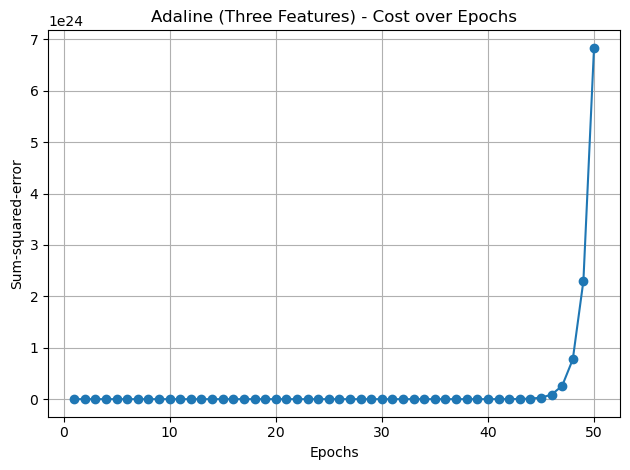

Perceptron accuracy: 1.0
Adaline accuracy: 0.02


In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Class'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Rename columns to match your feature names
df = df.rename(columns={
    'sepal length (cm)': 'Sepal_Length',
    'sepal width (cm)': 'Sepal_Width',
    'petal length (cm)': 'Petal_Length',
    'petal width (cm)': 'Petal_Width'
})

def prepare_binary_classification(df, class1, class2, features):
    df_binary = df[df['Class'].isin([class1, class2])]
    X = df_binary[features].values
    y = np.where(df_binary['Class'] == class1, -1, 1)
    return X, y

# Custom Adaline implementation to track loss
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Prepare data
features = ['Petal_Length', 'Petal_Width', 'Sepal_Length']
X, y = prepare_binary_classification(df, 'setosa', 'versicolor', features)

# Apply Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X, y)

# Standardize features and apply Adaline
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
ada = AdalineGD(eta=0.01, n_iter=50)
ada.fit(X_std, y)

# Plot cost for Adaline
plt.figure()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline (Three Features) - Cost over Epochs')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final accuracy for both models
print('Perceptron accuracy:', ppn.score(X, y))
print('Adaline accuracy:', np.mean(ada.predict(X_std) == y))

In [8]:
## use four features

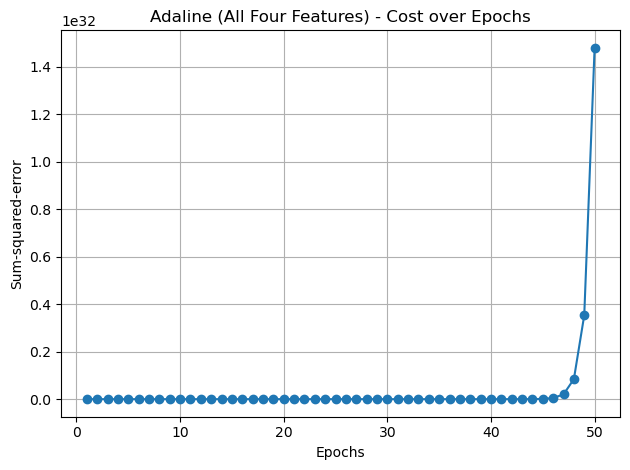

Perceptron accuracy: 1.0
Adaline accuracy: 0.0


In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Class'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Rename columns to match your feature names
df = df.rename(columns={
    'sepal length (cm)': 'Sepal_Length',
    'sepal width (cm)': 'Sepal_Width',
    'petal length (cm)': 'Petal_Length',
    'petal width (cm)': 'Petal_Width'
})

# Custom Adaline implementation to track loss
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

def prepare_binary_classification(df, class1, class2, features):
    df_binary = df[df['Class'].isin([class1, class2])]
    X = df_binary[features].values
    y = np.where(df_binary['Class'] == class1, -1, 1)
    return X, y

# Initialize models
ppn = Perceptron(eta0=0.1, random_state=1)
ada = AdalineGD(eta=0.01, n_iter=50)

# Prepare data with all four features
features = ['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']
X, y = prepare_binary_classification(df, 'setosa', 'versicolor', features)

# Apply Perceptron
ppn.fit(X, y)

# Standardize features and apply Adaline
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
ada.fit(X_std, y)

# Plot cost for Adaline
plt.figure()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline (All Four Features) - Cost over Epochs')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final accuracy for both models
print('Perceptron accuracy:', ppn.score(X, y))
print('Adaline accuracy:', np.mean(ada.predict(X_std) == y))
plt.show()

In [12]:
## select non linearly seperable 

In [15]:
!pip install mlxtend


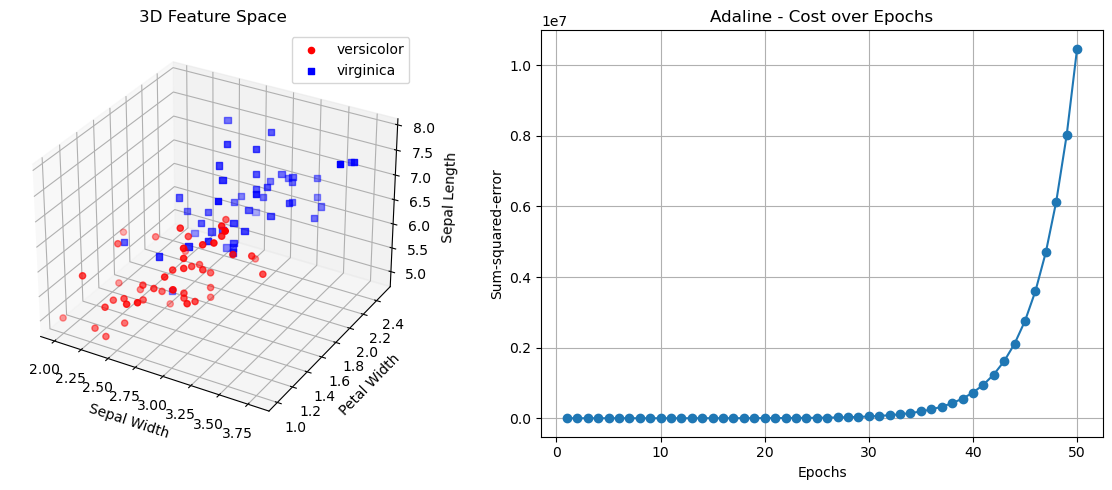

Perceptron accuracy: 0.92
Adaline accuracy: 0.22


In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Class'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Rename columns to match your feature names
df = df.rename(columns={
    'sepal length (cm)': 'Sepal_Length',
    'sepal width (cm)': 'Sepal_Width',
    'petal length (cm)': 'Petal_Length',
    'petal width (cm)': 'Petal_Width'
})

def prepare_binary_classification(df, class1, class2, features):
    df_binary = df[df['Class'].isin([class1, class2])]
    X = df_binary[features].values
    y = np.where(df_binary['Class'] == class1, -1, 1)
    return X, y

# Custom Adaline implementation
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Initialize models
ppn = Perceptron(eta0=0.1, random_state=1)
ada = AdalineGD(eta=0.01, n_iter=50)

# Use three non-linearly separable features
features = ['Sepal_Width', 'Petal_Width', 'Sepal_Length']
X, y = prepare_binary_classification(df, 'versicolor', 'virginica', features)

# Apply Perceptron
ppn.fit(X, y)

# Standardize features and apply Adaline
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
ada.fit(X_std, y)

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 5))

# Plot 1: 3D scatter plot
ax1 = fig.add_subplot(121, projection='3d')
class1_mask = y == -1
class2_mask = y == 1

ax1.scatter(X[class1_mask, 0], X[class1_mask, 1], X[class1_mask, 2], 
           c='red', marker='o', label='versicolor')
ax1.scatter(X[class2_mask, 0], X[class2_mask, 1], X[class2_mask, 2], 
           c='blue', marker='s', label='virginica')

ax1.set_xlabel('Sepal Width')
ax1.set_ylabel('Petal Width')
ax1.set_zlabel('Sepal Length')
ax1.set_title('3D Feature Space')
ax1.legend()

# Plot 2: Adaline cost function
ax2 = fig.add_subplot(122)
ax2.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Sum-squared-error')
ax2.set_title('Adaline - Cost over Epochs')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print accuracies
print('Perceptron accuracy:', ppn.score(X, y))
print('Adaline accuracy:', np.mean(ada.predict(X_std) == y))

In [19]:
## using all four feature 

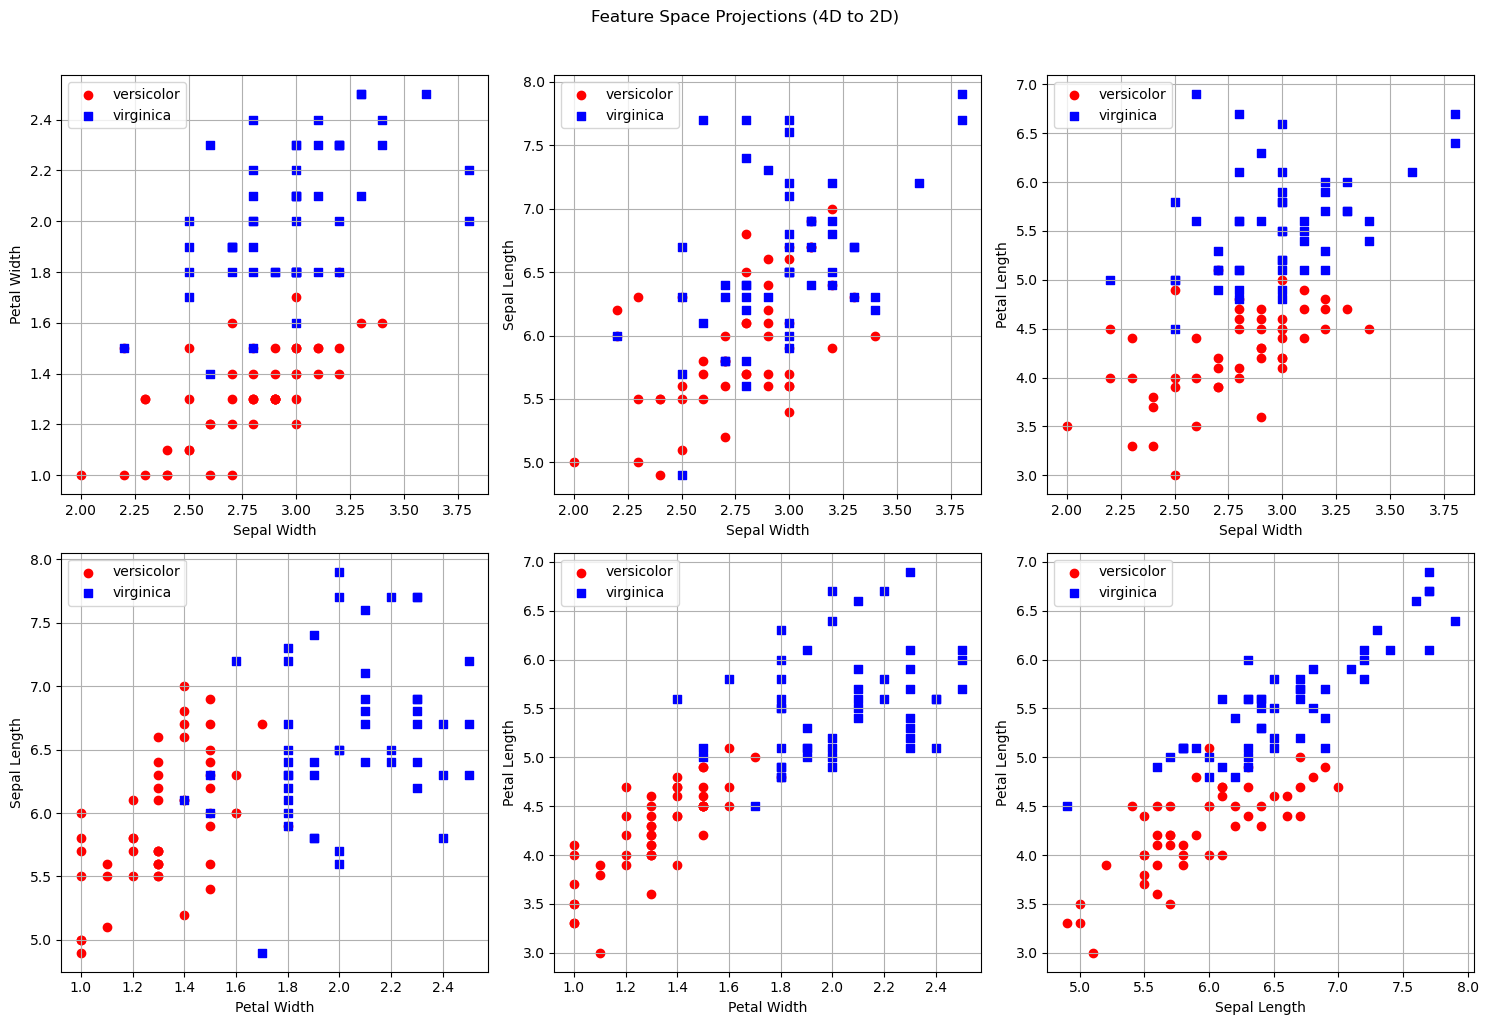

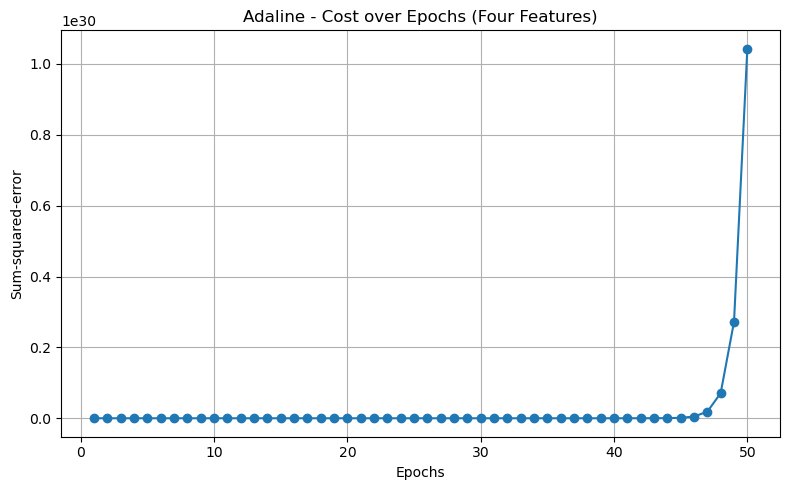


Model Accuracies:
Perceptron accuracy: 0.88
Adaline accuracy: 0.19

Feature Importance (Adaline):
Sepal_Width: 71474899885510.1562
Petal_Width: 83540751606226.2969
Sepal_Length: 83374620174232.8281
Petal_Length: 89386069973760.8438

Model Parameters:
Perceptron weights: [-3.32  5.62 -4.19  5.39]
Perceptron bias: -2.500000000000001
Adaline weights: [-7.14748999e+13 -8.35407516e+13 -8.33746202e+13 -8.93860700e+13]
Adaline bias: 0.011030920666833536

Confusion Matrix (Perceptron):
[[50  0]
 [12 38]]

Confusion Matrix (Adaline):
[[ 8 42]
 [39 11]]


In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Class'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Rename columns to match your feature names
df = df.rename(columns={
    'sepal length (cm)': 'Sepal_Length',
    'sepal width (cm)': 'Sepal_Width',
    'petal length (cm)': 'Petal_Length',
    'petal width (cm)': 'Petal_Width'
})

def prepare_binary_classification(df, class1, class2, features):
    df_binary = df[df['Class'].isin([class1, class2])]
    X = df_binary[features].values
    y = np.where(df_binary['Class'] == class1, -1, 1)
    return X, y

# Custom Adaline implementation
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Initialize models
ppn = Perceptron(eta0=0.1, random_state=1)
ada = AdalineGD(eta=0.01, n_iter=50)

# Use all four features
features = ['Sepal_Width', 'Petal_Width', 'Sepal_Length', 'Petal_Length']
X, y = prepare_binary_classification(df, 'versicolor', 'virginica', features)

# Apply Perceptron
ppn.fit(X, y)

# Standardize features and apply Adaline
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
ada.fit(X_std, y)

# Create visualization of the 4D data using multiple 2D projections
fig = plt.figure(figsize=(15, 10))

# Create a grid of scatter plots for different feature pairs
feature_pairs = [
    (0, 1, 'Sepal Width', 'Petal Width'),
    (0, 2, 'Sepal Width', 'Sepal Length'),
    (0, 3, 'Sepal Width', 'Petal Length'),
    (1, 2, 'Petal Width', 'Sepal Length'),
    (1, 3, 'Petal Width', 'Petal Length'),
    (2, 3, 'Sepal Length', 'Petal Length')
]

# Plot the 2D projections
for idx, (i, j, xlabel, ylabel) in enumerate(feature_pairs):
    ax = fig.add_subplot(2, 3, idx+1)
    
    # Plot points for each class
    class1_mask = y == -1
    class2_mask = y == 1
    
    ax.scatter(X[class1_mask, i], X[class1_mask, j], 
              c='red', marker='o', label='versicolor')
    ax.scatter(X[class2_mask, i], X[class2_mask, j], 
              c='blue', marker='s', label='virginica')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

plt.suptitle('Feature Space Projections (4D to 2D)', y=1.02)
plt.tight_layout()
plt.show()

# Plot Adaline cost function
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Cost over Epochs (Four Features)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print accuracies and feature importance
print('\nModel Accuracies:')
print('Perceptron accuracy:', ppn.score(X, y))
print('Adaline accuracy:', np.mean(ada.predict(X_std) == y))

# Calculate and print feature importance for Adaline
print('\nFeature Importance (Adaline):')
importance = np.abs(ada.w_[1:])
for feat, imp in zip(features, importance):
    print(f'{feat}: {imp:.4f}')

# Print weights and bias
print('\nModel Parameters:')
print('Perceptron weights:', ppn.coef_[0])
print('Perceptron bias:', ppn.intercept_[0])
print('Adaline weights:', ada.w_[1:])
print('Adaline bias:', ada.w_[0])

# Calculate separation metrics
from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix (Perceptron):')
print(confusion_matrix(y, ppn.predict(X)))

print('\nConfusion Matrix (Adaline):')
print(confusion_matrix(y, ada.predict(X_std)))